Getting started with the Keras sequential model

In [19]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

1.13.1


In [20]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')


def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])


Let's start with using a fully-connected neural network to do predict housing prices. The following image highlights the difference between regression and classification (see part 2). Given an observation as input, regression outputs a continuous value (e.g., exact temperature) and classificaiton outputs a class/category that the observation belongs to.

                                            classification_regression

For the Boston housing dataset, we get 506 rows of data, with 13 features in each. Our task is to build a regression model that takes these 13 features as input and output a single value prediction of the "median value of owner-occupied homes (in $1000)."

Now, we load the dataset. Loading the dataset returns four NumPy arrays:

    The train_images and train_labels arrays are the training set—the data the model uses to learn.
    The model is tested against the test set, the test_images, and test_labels arrays.


In [21]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

The core data structure of Keras is a model, a way to orgnize layers.
The simplest type of model is the sequential

Hopefully, you are familiar with keras.Sequential()
Here is the function:

    keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
            bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
            kernel_constraint=None, bias_constraint=None)

activation - relu;


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.......................
Final Root Mean Square Error on validation set: 2.343


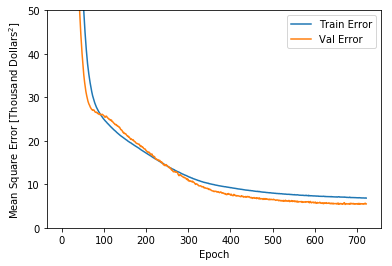

In [22]:
def build_model():
    model = keras.Sequential()
    model.add(Dense(units=20,activation=tf.nn.relu,input_dim=len(train_features[0])))
    model.add(Dense(units=1))

    model.compile(optimizer=tf.train.AdamOptimizer(), 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model


model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

plot_history()

activation - tanh; 


....................................................................................................
....................................................................................................
....................................................................................................
......................
Final Root Mean Square Error on validation set: 3.903


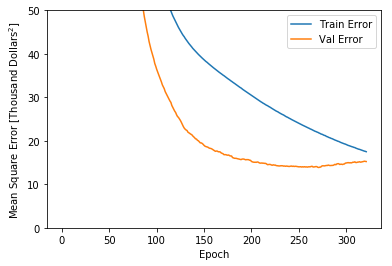

In [25]:
def build_model():
    model = keras.Sequential()
    model.add(Dense(units=20,activation=tf.nn.tanh,input_dim=len(train_features[0])))
    model.add(Dense(units=1))

    model.compile(optimizer=tf.train.AdamOptimizer(), 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model


model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

plot_history()

activation - tanh; 


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

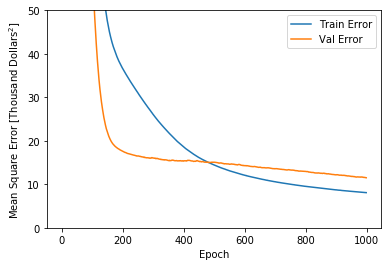

In [28]:
def build_model():
    model = keras.Sequential()
    model.add(Dense(units=20,activation=tf.nn.sigmoid,input_dim=len(train_features[0])))
    model.add(Dense(units=1))

    model.compile(optimizer=tf.train.AdamOptimizer(), 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model


model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

plot_history()